# 지하철 이용객 분석 
- https://data.busan.go.kr/
- 승하차 인원정보 검색
- 일별역별시간대별승하차 파일받기
- 최신 csv파일로 받기
- <br>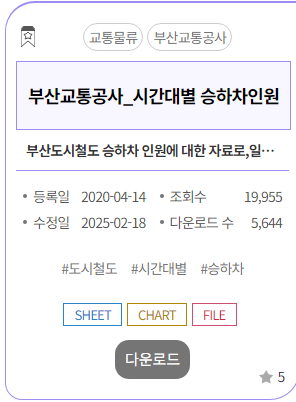</br>

In [1]:
import pandas as pd
file_path = './ref/일별역별시간대별승하차인원(2025년1월).csv'
data=pd.read_csv(file_path, encoding='EUC-KR')
data.head() #데이터 5개 가져오기
data.tail()

,역번호,역명,년월일,요일,구분,합계,01시-02시,02시-03시,03시-04시,04시-05시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시-01시
6939,414,안평,2025-01-29,수,하차,799,0,0,0,1,...,59,70,65,57,34,41,31,30,26,10
6940,414,안평,2025-01-30,목,승차,1041,0,0,0,4,...,92,110,81,77,34,22,15,14,6,0
6941,414,안평,2025-01-30,목,하차,996,0,0,0,0,...,77,84,78,88,49,48,39,53,26,14
6942,414,안평,2025-01-31,금,승차,1898,0,0,2,4,...,113,146,155,135,54,34,17,11,7,0
6943,414,안평,2025-01-31,금,하차,1773,0,0,2,0,...,143,136,163,152,95,74,46,43,47,26


In [2]:
columns = ['num','name','date','week','type','total']
time_col = [f"{i}~{i+1}H"for i in range(1,24)]
columns = columns + time_col + ['24~01H']
data.columns =columns
df = data.loc[:,:'total']
df

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수,승차,8126
1,95,다대포해수욕장,2025-01-01,수,하차,7674
2,95,다대포해수욕장,2025-01-02,목,승차,4893
3,95,다대포해수욕장,2025-01-02,목,하차,3965
4,95,다대포해수욕장,2025-01-03,금,승차,4572
...,...,...,...,...,...,...
6939,414,안평,2025-01-29,수,하차,799
6940,414,안평,2025-01-30,목,승차,1041
6941,414,안평,2025-01-30,목,하차,996
6942,414,안평,2025-01-31,금,승차,1898


In [3]:
data = df.groupby(['num','name','date']).sum().reset_index()
# data[data['date']=='2025-01-01']
data

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수수,승차하차,15800
1,95,다대포해수욕장,2025-01-02,목목,승차하차,8858
2,95,다대포해수욕장,2025-01-03,금금,승차하차,8279
3,95,다대포해수욕장,2025-01-04,토토,승차하차,8477
4,95,다대포해수욕장,2025-01-05,일일,승차하차,6912
...,...,...,...,...,...,...
3467,414,안평,2025-01-27,월월,승차하차,2716
3468,414,안평,2025-01-28,화화,승차하차,1987
3469,414,안평,2025-01-29,수수,승차하차,1633
3470,414,안평,2025-01-30,목목,승차하차,2037


In [4]:
gdata=data[['name','date','total']]
gdata=gdata.sort_values(by=['name','date'], ascending=[True,True])

In [5]:
mdata=gdata.groupby(by='name').sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,가야,194925
1,감전,211937
2,강서구청,140162
3,개금,442819
4,거제,313595
...,...,...
103,토성,436698
104,하단,1003733
105,해운대,803371
106,호포,67287


In [6]:
sdata = tdata.sort_values(by='total',ascending=False)
total_data = sdata[:20]
total_data

,name,total
70,서면,3626209
83,연산,1500575
61,부산역,1337149
65,사상,1230792
36,동래,1089751
72,센텀시티,1083780
88,자갈치,1070458
23,남포,1045512
64,부전,1008329
104,하단,1003733


In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams['font.family'] = 'D2Coding'

In [8]:
# rint(plt.rcParams['font.family'])
# for font in fm.findSystemFonts():
#     print(font)

In [9]:
# !pip install squarify

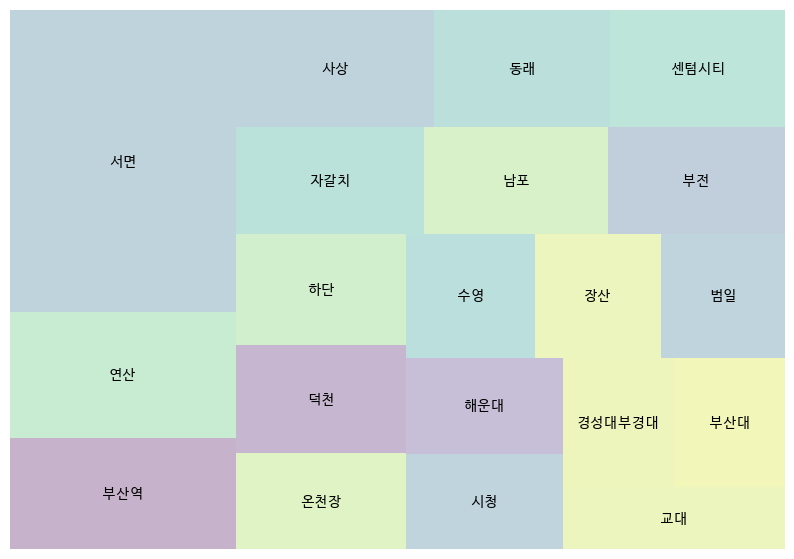

In [10]:
import squarify
plt.figure(figsize=(10,7))
squarify.plot(sizes=total_data['total'],label=total_data['name'],alpha=0.3)  #alpha=밝기
plt.rcParams['font.size']=12
plt.rcParams['text.color']='blue'
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

# 팀과제 지하철 역별 승하차 인구수

In [11]:
#팀 과제
import pandas as pd
file_path = './ref/서울시지하철호선별역별승하차인원정보.csv'
data=pd.read_csv(file_path, encoding='EUC-KR')

In [12]:
columns = ['date','num','name','in','out','date2']
data.columns =columns
df = data.loc[:,:'out']

In [20]:
data = df.groupby(['num','name']).sum().reset_index()
print(data)
data['total'] = data['in'] + data['out']
sdata = data[['num','name','total']]
tdata = sdata[data['num'] == '5호선']
tdata = tdata.sort_values(by=['total'], ascending=False)
total_data = tdata[['name','total']]
total_data

     num name       date       in      out
0    1호선  동대문  789756744   440289   428441
1    1호선  동묘앞  789756744   373995   385061
2    1호선  서울역  789756744  2507258  2330880
3    1호선   시청  789756744   935052   940401
4    1호선  신설동  789756744   489269   471431
..   ...  ...        ...      ...      ...
616  중앙선   원덕  789756744    11365    10859
617  중앙선   중랑  789756744   190719   184486
618  중앙선   지평  789756744     1704     1850
619  중앙선   팔당  789756744    26701    27866
620  중앙선   회기  789756744   836412   802273

[621 rows x 5 columns]


,name,total
128,광화문(세종문화회관),2423323
157,여의도,1991807
175,화곡,1914995
133,까치산,1907658
144,발산,1633904
161,오목교(목동운동장앞),1535013
168,천호(풍납토성),1427101
166,장한평,1342544
148,서대문,1307792
120,강동,1295597


In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
plt.rcParams['font.family'] = 'D2Coding'

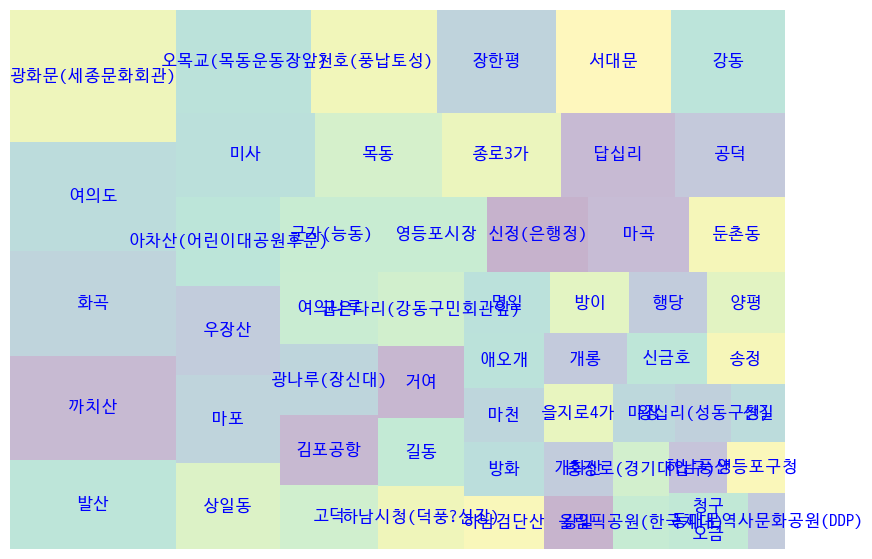

In [15]:
import squarify
plt.figure(figsize=(10,7))
squarify.plot(sizes=total_data['total'],label=total_data['name'],alpha=0.3)  #alpha=밝기
plt.rcParams['font.size']=8
plt.rcParams['text.color']='blue'
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

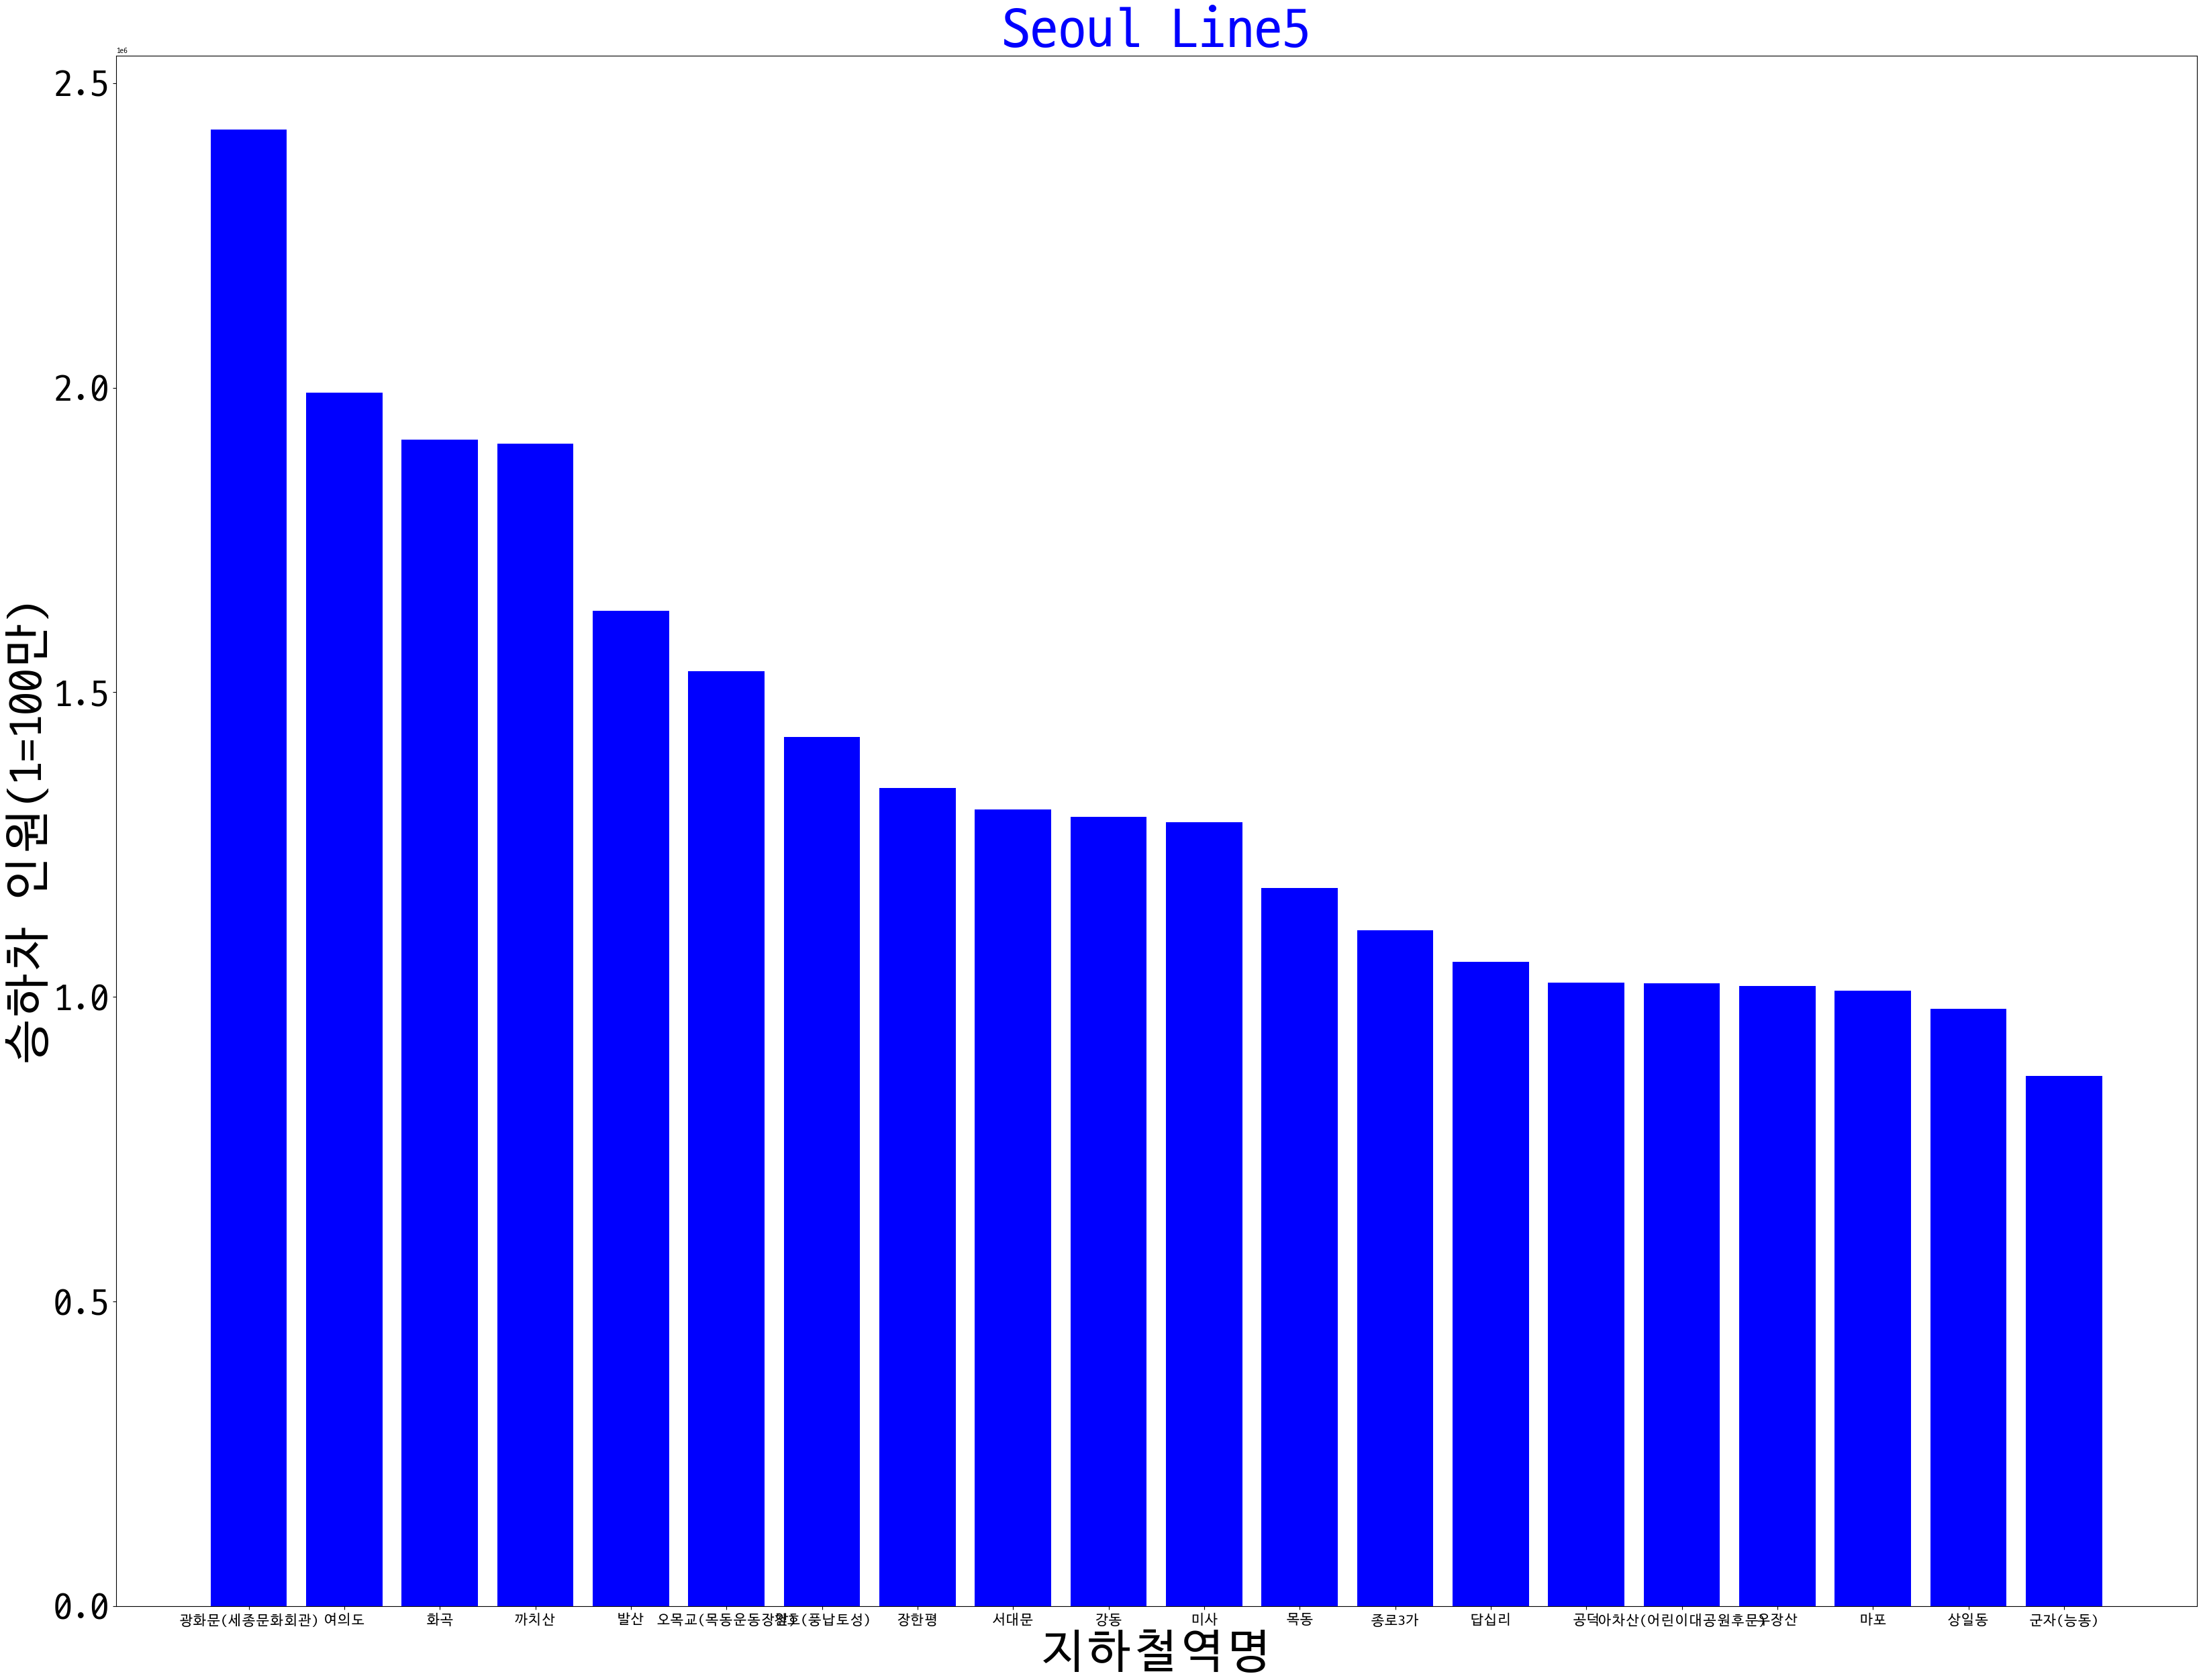

In [16]:
graph_data = total_data.iloc[:20]
plt.figure(figsize=(40,30))
plt.bar(x = graph_data['name'], height = graph_data['total'],color='blue')

plt.xlabel('지하철역명', fontsize=50)
plt.ylabel('승하차 인원(1=100만)', fontsize=50)
plt.xticks(fontsize=15)  # x축 눈금 글씨 크기
plt.yticks(fontsize=40)  # y축 눈금 글씨 크기
plt.title('Seoul Line5', fontsize=60)
plt.show()